📝 HW Questions:

- Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

- Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

- Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("Data.csv")

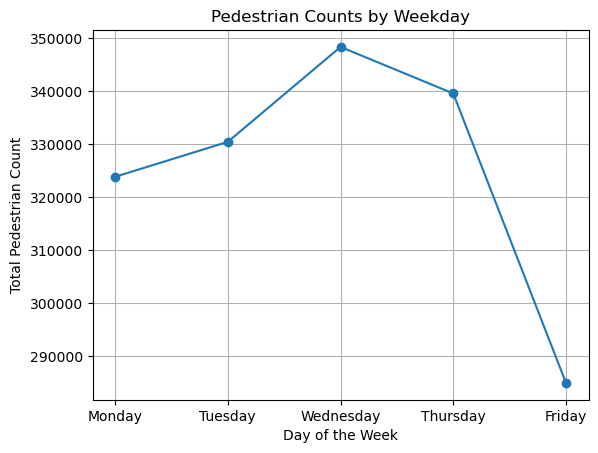

In [9]:
# 1) Weekdays (Mon–Fri) line plot

df['hour_beginning'] = pd.to_datetime(
    df['hour_beginning'], 
    format="%Y %b %d %I:%M:%S %p",
    errors='coerce')

df['Pedestrians'] = pd.to_numeric(
    df['Pedestrians'], errors='coerce')

df['dow'] = df['hour_beginning'].dt.dayofweek
name_map = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['day_name'] = df['dow'].map(name_map)

weekdays = df[df['dow'] < 5]
order = ['Monday','Tuesday','Wednesday','Thursday','Friday']
weekday_counts = weekdays.groupby('day_name', sort=False)['Pedestrians'].sum().reindex(order)

plt.figure()
plt.plot(order, weekday_counts.values, marker='o')
plt.title('Pedestrian Counts by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Total Pedestrian Count')
plt.grid(True)
plt.show()

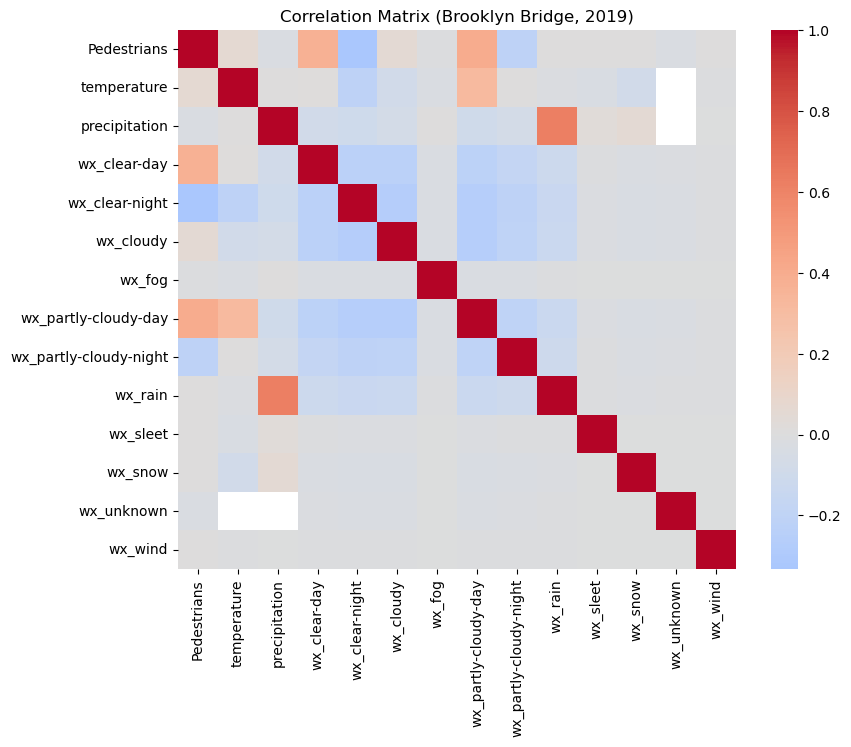

weather_summary
cloudy                 257983.0
partly-cloudy-day      253357.0
clear-day              247387.0
rain                    97303.0
clear-night             60781.0
partly-cloudy-night     60070.0
snow                     5855.0
fog                      2410.0
sleet                    1426.0
wind                      806.0
unknown                    28.0
Name: Pedestrians, dtype: float64


In [10]:
# 2) 2019 weather analysis + correlation matrix

bb = df[df['location'] == 'Brooklyn Bridge'].copy()
bb19 = bb[bb['hour_beginning'].dt.year == 2019].copy()
bb19['weather_summary'] = bb19['weather_summary'].astype(str).str.strip().replace({'nan':'unknown'}).fillna('unknown')
bb19['temperature'] = pd.to_numeric(bb19['temperature'], errors='coerce')
bb19['precipitation'] = pd.to_numeric(bb19['precipitation'], errors='coerce')

weather_sorted = bb19.groupby('weather_summary')['Pedestrians'].sum().sort_values(ascending=False)

base = bb19[['Pedestrians','temperature','precipitation']]
wx = pd.get_dummies(bb19['weather_summary'], prefix='wx')
corr = pd.concat([base, wx], axis=1).corr().round(3)


plt.figure(figsize=(9,7))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Brooklyn Bridge, 2019)')
plt.show()

print(weather_sorted)

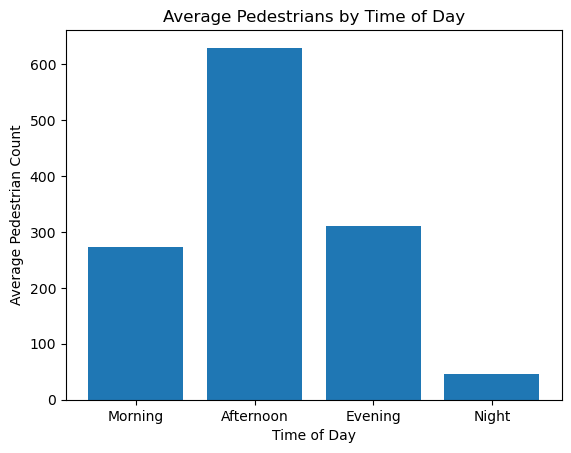

In [11]:
# 3) Time-of-day categories + analysis

def time_of_day(h):
    if 5 <= h < 12: return 'Morning'
    if 12 <= h < 17: return 'Afternoon'
    if 17 <= h < 21: return 'Evening'
    return 'Night'

df['time_of_day'] = df['hour_beginning'].dt.hour.apply(time_of_day)
tod_order = ['Morning','Afternoon','Evening','Night']
tod_stats = df.groupby('time_of_day')['Pedestrians'].mean().reindex(tod_order)

plt.figure()
plt.bar(tod_order, tod_stats.values)
plt.title('Average Pedestrians by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.show()